# Web Graph Embedding

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from html_graph_lib import HTMLGraph, HTMLDoc, GraphPlotter
from karateclub import Node2Vec, DeepWalk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

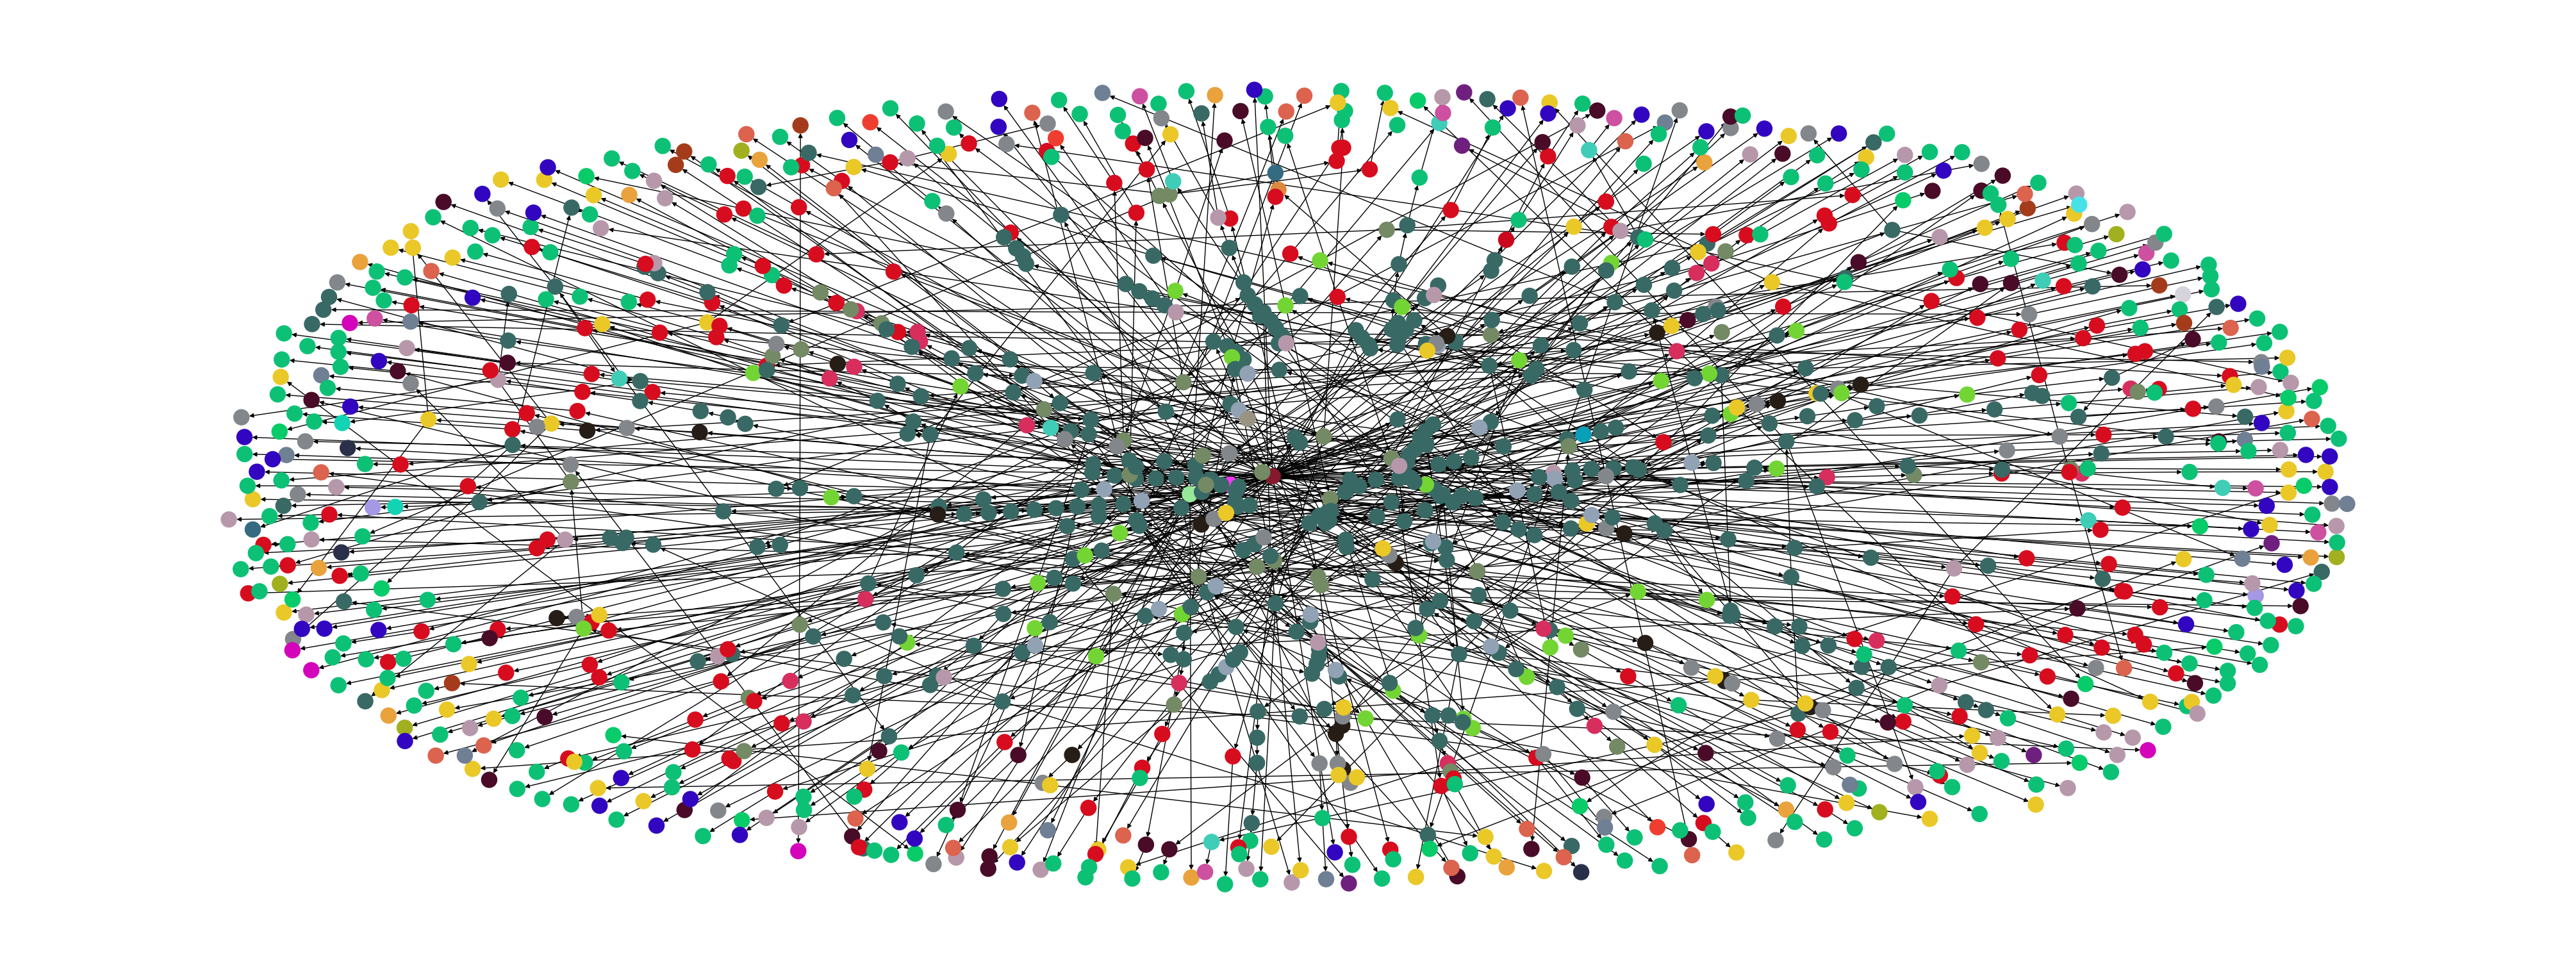

In [2]:
URL = 'https://www.qytera.de'
doc = HTMLDoc.from_url(URL)
G, colors = doc.get_graph(index_builder=HTMLGraph.numeric_index)
GraphPlotter.plot_graph(G, colors)

In [3]:
res = requests.get(URL)
doc = HTMLDoc(res.text)

In [4]:
df = doc.get_df()
df

tag  class_html  class_front  class_not-logged-in  class_no-sidebars  \
0       html         0.0          0.0                  0.0                0.0   
1       head         0.0          0.0                  0.0                0.0   
2       meta         0.0          0.0                  0.0                0.0   
3       link         0.0          0.0                  0.0                0.0   
4       meta         0.0          0.0                  0.0                0.0   
...      ...         ...          ...                  ...                ...   
1239  script         0.0          0.0                  0.0                0.0   
1240  script         0.0          0.0                  0.0                0.0   
1241  script         0.0          0.0                  0.0                0.0   
1242  script         0.0          0.0                  0.0                0.0   
1243  script         0.0          0.0                  0.0                0.0   

      class_page-landingpage  class_i18n-de  class_lang-de  \
0                        0.0            0.0            0.0   
1                        0.0            0.0            0.0   
2                        0.0            0.0            0.0   
3                        0.0            0.0            0.0   
4                        0.0            0.0            0.0   
...                      ...            ...            ...   
1239                     0.0            0.0            0.0   
1240                     0.0            0.0            0.0   
1241                     0.0            0.0            0.0   
1242                     0.0            0.0            0.0   
1243                     0.0            0.0            0.0   

      class_site-name-die-experten-in-continuous-testing-und-testautomatisierung  \
0                                                   0.0                            
1                                                   0.0                            
2                                                   0.0                            
3                                                   0.0                            
4                                                   0.0                            
...                                                 ...                            
1239                                                0.0                            
1240                                                0.0                            
1241                                                0.0                            
1242                                                0.0                            
1243                                                0.0                            

      class_page-panels  ...  class_submit_container  class_cr_form-block  \
0                   0.0  ...                     0.0                  0.0   
1                   0.0  ...                     0.0                  0.0   
2                   0.0  ...                     0.0                  0.0   
3                   0.0  ...                     0.0                  0.0   
4                   0.0  ...                     0.0                  0.0   
...                 ...  ...                     ...                  ...   
1239                0.0  ...                     0.0                  0.0   
1240                0.0  ...                     0.0                  0.0   
1241                0.0  ...                     0.0                  0.0   
1242                0.0  ...                     0.0                  0.0   
1243                0.0  ...                     0.0                  0.0   

      class_cr_button  class_newsletter-anmeldung-footer-bild  \
0                 0.0                                     0.0   
1                 0.0                                     0.0   
2                 0.0                                     0.0   
3                 0.0                                     0.0   
4                 0.0           

In [5]:
tags = df['tag'].unique()
tagdict = {}
for i, v in enumerate(tags):
    tagdict |= {v: i}
    
tag_ids = np.array([tagdict[x] for x in df['tag']])

In [6]:
df_transformed = pd.get_dummies(df)
df_transformed

class_html  class_front  class_not-logged-in  class_no-sidebars  \
0            0.0          0.0                  0.0                0.0   
1            0.0          0.0                  0.0                0.0   
2            0.0          0.0                  0.0                0.0   
3            0.0          0.0                  0.0                0.0   
4            0.0          0.0                  0.0                0.0   
...          ...          ...                  ...                ...   
1239         0.0          0.0                  0.0                0.0   
1240         0.0          0.0                  0.0                0.0   
1241         0.0          0.0                  0.0                0.0   
1242         0.0          0.0                  0.0                0.0   
1243         0.0          0.0                  0.0                0.0   

      class_page-landingpage  class_i18n-de  class_lang-de  \
0                        0.0            0.0            0.0   
1                        0.0            0.0            0.0   
2                        0.0            0.0            0.0   
3                        0.0            0.0            0.0   
4                        0.0            0.0            0.0   
...                      ...            ...            ...   
1239                     0.0            0.0            0.0   
1240                     0.0            0.0            0.0   
1241                     0.0            0.0            0.0   
1242                     0.0            0.0            0.0   
1243                     0.0            0.0            0.0   

      class_site-name-die-experten-in-continuous-testing-und-testautomatisierung  \
0                                                   0.0                            
1                                                   0.0                            
2                                                   0.0                            
3                                                   0.0                            
4                                                   0.0                            
...                                                 ...                            
1239                                                0.0                            
1240                                                0.0                            
1241                                                0.0                            
1242                                                0.0                            
1243                                                0.0                            

      class_page-panels  class_color-scheme-custom  ...  tag_p  tag_script  \
0                   0.0                        0.0  ...      0           0   
1                   0.0                        0.0  ...      0           0   
2                   0.0                        0.0  ...      0           0   
3                   0.0                        0.0  ...      0           0   
4                   0.0                        0.0  ...      0           0   
...                 ...                        ...  ...    ...         ...   
1239                0.0                        0.0  ...      0           1   
1240                0.0                        0.0  ...      0           1   
1241                0.0                        0.0  ...      0           1   
1242                0.0                        0.0  ...      0           1   
1243                0.0                        0.0  ...      0           1   

      tag_section  tag_select  tag_span  tag_strong  tag_style  tag_time  \
0               0           0         0           0          0         0   
1               0           0         0           0          0         0   
2               0           0         0           0          0         0   
3               0           0         0           0          0         0   
4               0           0         0           0       

## PCA

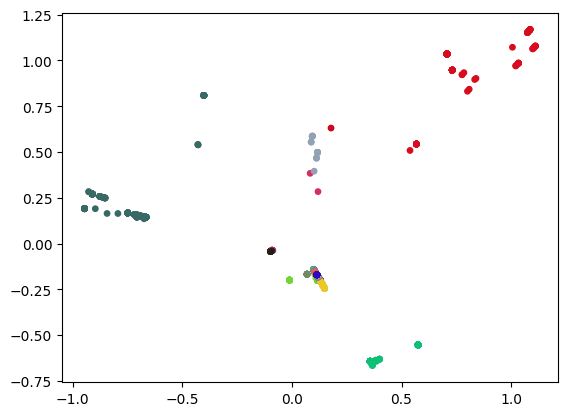

In [7]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(df_transformed)

fix, ax = plt.subplots(1, 1)
ax.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=colors, s=15, cmap='coolwarm')

## T-SNE

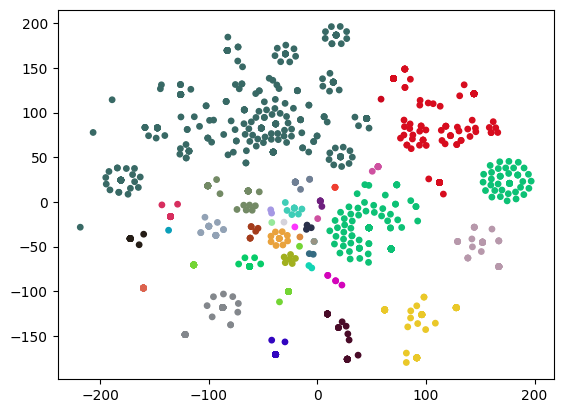

In [8]:
tsne = TSNE(n_components=2)
tsne_embedding = tsne.fit_transform(df_transformed)

fix, ax = plt.subplots(1, 1)
ax.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=colors, s=15)

## Deep Walk

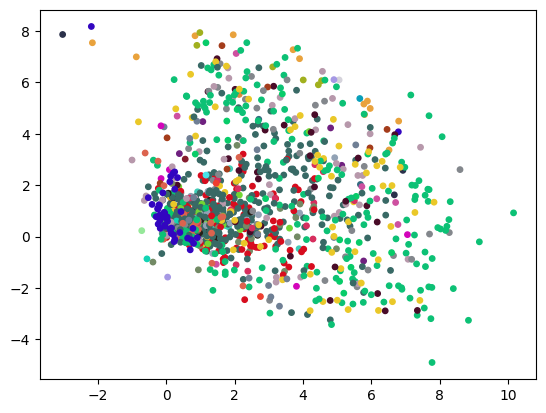

In [22]:
model = DeepWalk(walk_number=10, walk_length=10, dimensions=2)
model.fit(G)
dw_embedding = model.get_embedding()

fix, ax = plt.subplots(1, 1)
ax.scatter(dw_embedding[:, 0], dw_embedding[:, 1], c=colors, s=15, cmap='coolwarm')

## Node2Vec

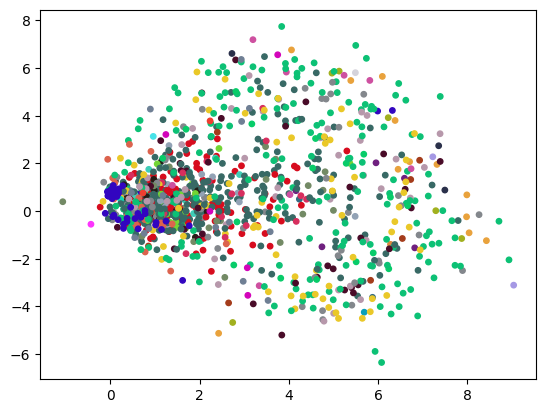

In [25]:
model = Node2Vec(walk_number=10, walk_length=10, p=0.1, q=0.9, dimensions=2)
model.fit(G)
n2v_embedding = model.get_embedding()

fix, ax = plt.subplots(1, 1)
ax.scatter(n2v_embedding[:, 0], n2v_embedding[:, 1], c=colors, s=15, cmap='coolwarm')

What we can see here that RandomWalk and Node2Vec do not take into account the feature vectors of the nodes, but only use the edges for computing the embedding. So the DeepWalk and Node2Vec embeddings is not suited for classifying nodes by their feature vectors. 